In [11]:
import pandas as pd
import numpy as np

### LOAD DATA, DICTIONARY, COHERNECE SCORES, LISTS

In [12]:
df_1 = pd.read_csv('data/articles1.csv')
df_1.head()

Unnamed: 0     id  \
0  0           17283   
1  1           17284   
2  2           17285   
3  3           17286   
4  4           17287   

                                                                                         title  \
0  House Republicans Fret About Winning Their Health Care Suit - The New York Times              
1  Rift Between Officers and Residents as Killings Persist in South Bronx - The New York Times   
2  Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial Bias, Dies at 106 - The New York Times          
3  Among Deaths in 2016, a Heavy Toll in Pop Music - The New York Times                          
4  Kim Jong-un Says North Korea Is Preparing to Test Long-Range Missile - The New York Times     

      publication                         author        date    year  month  \
0  New York Times  Carl Hulse                     2016-12-31  2016.0  12.0    
1  New York Times  Benjamin Mueller and Al Baker  2017-06-19  2017.0  6.0     
2  New York Times  Margalit Fox                   2017-01-06  2017.0  1.0     
3  New York Times  William McDonald               2017-04-10  2017.0  4.0     
4  New York Times  Choe Sang-Hun                  2017-01-02  2017.0  1.0     

   url  \
0 NaN    
1 NaN    
2 NaN    
3 NaN    
4 NaN    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [13]:
import pickle 

with open("lists/bow_corpus.txt", "rb") as fp:   # Unpickling
    bow_corpus = pickle.load(fp)
    
with open("lists/norm_corpus_bigrams.txt", "rb") as fp:   # Unpickling
    norm_corpus_bigrams = pickle.load(fp)
    
with open("lists/norm_papers.txt", "rb") as fp:   # Unpickling
    norm_papers = pickle.load(fp)
    
with open("lists/pre_papers.txt", "rb") as fp:   # Unpickling
    pre_papers = pickle.load(fp)
    
with open("lists/pre_titles.txt", "rb") as fp:   # Unpickling
    pre_titles = pickle.load(fp)

In [14]:
import nltk
import gensim

dictionary = gensim.corpora.Dictionary.load('models/dictionary.gensim')
coherence_df = pd.read_csv('models/mallet_scores/coherence_df.csv')

with open("models/mallet_scores/coherence_scores.txt", "rb") as fp:   # Unpickling
    coherence_scores = pickle.load(fp)


### Visualizing coherence scores of LDA models

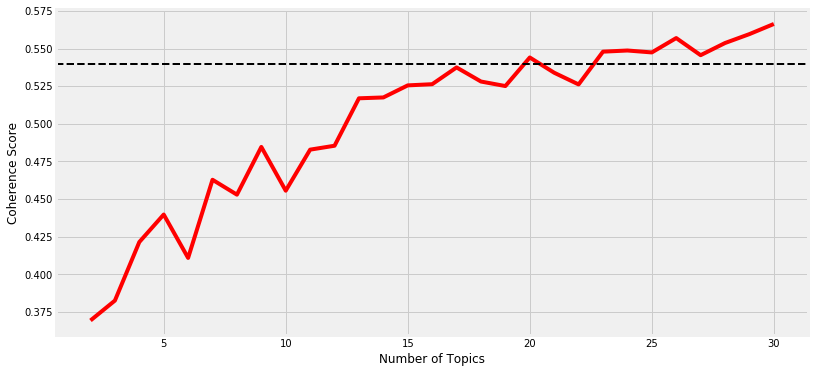

In [15]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline
x_ax = range(2, 31, 1)
y_ax = coherence_scores
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_ax, c="r")
plt.axhline(y=0.540, c="k", linestyle="--", linewidth=2)
plt.rcParams['figure.facecolor'] = 'white'
xl = plt.xlabel('Number of Topics')
yl = plt.ylabel('Coherence Score')

### SELECTING LDA MODEL BASED ON COHERENCE

In [26]:
TOPICS = 25

load_lda_model = gensim.models.wrappers.LdaMallet.load('models/mallet/model_'+str(TOPICS)+'.gensim')

# convert the ldaMallet to LdaModel. It was the only way to get some result with loading mallet models.
load_lda_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(load_lda_model)

### EVALUATING TOPICS

In [27]:
topics = [[(term, round(wt, 3))
               for term, wt in load_lda_model.show_topic(n, topn=20)]
                   for n in range(0, load_lda_model.num_topics)]

pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, load_lda_model.num_topics+1)]
                         )
topics_df

,Terms per Topic
Topic1,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day"
Topic2,"official, email, investigation, report, clinton, information, russian, fbi, intelligence, russia, campaign, comey, document, committee, evidence, government, source, time, agency, hillary_clinton"
Topic3,"military, isi, attack, syria, force, war, group, government, official, killed, islamic_state, american, syrian, iraq, people, soldier, city, civilian, fighting, army"
Topic4,"law, state, court, decision, rule, federal, case, order, supreme_court, legal, public, government, policy, issue, judge, abortion, ban, justice, statement, action"
Topic5,"water, area, people, fire, flight, plane, cnn, home, official, land, airport, state, day, passenger, storm, air, island, road, part, ship"
Topic6,"country, china, united_state, government, russia, iran, leader, north_korea, official, international, deal, russian, israel, world, putin, power, president, military, nation, japan"
Topic7,"trump, president, obama, white_house, donald_trump, administration, day, american, washington, meeting, office, policy, president_barack, national_security, presidency, friday, issue, election, told, statement"
Topic8,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union"
Topic9,"company, facebook, car, technology, user, apple, online, google, product, internet, service, employee, twitter, customer, store, site, model, brand, time, tesla"
Topic10,"million, company, money, year, business, billion, market, chinese, price, bank, financial, pay, fund, deal, percent, cost, investor, firm, paid, sale"


### INTERPRETING RESULTS

In [28]:
tm_results = load_lda_model[bow_corpus]

corpus_topics = [sorted(topics, key=lambda record: -record[1])[0]
                     for topics in tm_results]
corpus_topics[:5]

[(11, 0.30565764688826996),
 (24, 0.2783692680461839),
 (14, 0.22230114899377068),
 (15, 0.2863338713529212),
 (5, 0.5028376982872709)]

In [29]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(pre_papers))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Title'] = pre_titles
corpus_topic_df['Paper'] = pre_papers

### DISTRIBUTION OF TOPICS

In [30]:
pd.set_option('display.max_colwidth', 200)

topic_stats_df = corpus_topic_df.groupby('Dominant Topic').agg({
                                                'Dominant Topic': {
                                                    'Doc Count': np.size,
                                                    '% Total Docs': np.size }
                                              })
topic_stats_df = topic_stats_df['Dominant Topic'].reset_index()
topic_stats_df['% Total Docs'] = topic_stats_df['% Total Docs'].apply(lambda row: round((row*100) / len(pre_papers), 2))
topic_stats_df['Topic Desc'] = [topics_df.iloc[t]['Terms per Topic'] for t in range(len(topic_stats_df))]
topic_stats_df

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


,Dominant Topic,Doc Count,% Total Docs,Topic Desc
0,1,2150,4.31,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day"
1,2,2501,5.01,"official, email, investigation, report, clinton, information, russian, fbi, intelligence, russia, campaign, comey, document, committee, evidence, government, source, time, agency, hillary_clinton"
2,3,2109,4.22,"military, isi, attack, syria, force, war, group, government, official, killed, islamic_state, american, syrian, iraq, people, soldier, city, civilian, fighting, army"
3,4,1458,2.92,"law, state, court, decision, rule, federal, case, order, supreme_court, legal, public, government, policy, issue, judge, abortion, ban, justice, statement, action"
4,5,1906,3.82,"water, area, people, fire, flight, plane, cnn, home, official, land, airport, state, day, passenger, storm, air, island, road, part, ship"
5,6,2045,4.10,"country, china, united_state, government, russia, iran, leader, north_korea, official, international, deal, russian, israel, world, putin, power, president, military, nation, japan"
6,7,1550,3.10,"trump, president, obama, white_house, donald_trump, administration, day, american, washington, meeting, office, policy, president_barack, national_security, presidency, friday, issue, election, to..."
7,8,2157,4.32,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union"
8,9,2630,5.27,"company, facebook, car, technology, user, apple, online, google, product, internet, service, employee, twitter, customer, store, site, model, brand, time, tesla"
9,10,1733,3.47,"million, company, money, year, business, billion, market, chinese, price, bank, financial, pay, fund, deal, percent, cost, investor, firm, paid, sale"


### DOCUMENTS RELATED TO GIVEN TOPIC

In [31]:
corpus_topic_df[corpus_topic_df['Dominant Topic'] == 8].sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
20003,20003,8,58.40,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",Interior Minister: Germans Should Prepare Themselves for Terror Attacks,"germany’s interior minister has told germans to expect more islamic terror attacks in the country, after a unaccompanied afghan migrant injured 18 people. thomas de maiziere insisted there is n..."
30014,30014,8,51.55,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union","DATA: Young Muslims in the West Are a Ticking Time Bomb, Increasingly Sympathising with Radicals, Terror","on the back of the brussels terror attack it is worthwhile remembering that while a majority of muslims in the west appear to have no truck with terrorism or extremism, there are a significant num..."
27736,27736,8,49.92,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",Marine and Marion Le Pen Slam Merkel for Berlin Attack,"following the berlin christmas market attack, french migration presidential candidate marine le pen, along with her populist niece marion pen, both slammed german chancellor angela merkel for ..."
23361,23361,8,47.41,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",Christmas on Lockdown: Beefed Up Security Across Europe,"many christmas markets are closed in germany today and police in the uk, france, norway, austria, denmark, italy, and other european nations are tightening security at festive events, with the ter..."
22281,22281,8,47.04,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",EU Chief: Borders Must Stay Open Despite Deadly Terror Attacks - Breitbart,"the best way to fight terror is with “openness” european union (eu) head juncker has said, stressing that europe must continue to receive migrants in the wake of the deadly truck attack in berli..."
...,...,...,...,...,...,...
42665,42665,8,5.00,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",Look at me! 27 selfies of the week,take a look at 27 selfies of the week from june 23 through june 30.
42456,42456,8,4.92,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",The week in 38 photos,take a look at 38 photos of the week from june 12 through june 18.
42584,42584,8,4.92,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",The week in 43 photos,take a look at 43 photos of the week from june 19 through june 25.
42284,42284,8,4.92,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",The week in 39 photos,take a look at 39 photos of the week from june 4 through june 11.


### DOCUMENT'S WITH HIGHEST TOPIC CONSTRIBUTION

In [32]:
corpus_topic_df.sort_values(by='Contribution %', ascending=False)

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
49734,49734,1,83.87,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day",NFL POWER RANKINGS: Where all 32 teams stand heading into Week 16,"’’ ’with just two weeks of regular season football remaining, the playoff picture is finally starting to gain some clarity.’ ’four teams have already clinched: the patriots, raiders, cowboys, and ..."
4642,4642,1,83.58,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day",N.F.L.: There’s Dallas’s Dak Prescott and Then All the Other Rookie QBs - The New York Times,not all rookie quarterbacks are the same. here’s what else we learned in week 11 in the n. f. l.: ■ dak prescott is not a product of weak competition. facing the no. 1 defense in the n. f. l. pres...
6191,6191,1,82.82,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day",N.F.L.: The New England Patriots Are Beatable. The Cowboys? Maybe Not. - The New York Times,games and victories were in style once again in n. f. l. week 10. here’s what we learned from an exciting sunday: ■ the dallas cowboys are too young to lose the games they are supposed to los...
6435,6435,1,81.78,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day","N.F.L. Playoffs: Cowboys, Patriots and Raiders Hold Tight to Top Spots - The New York Times","the n. f. l. playoff picture became much clearer on sunday, with the patriots, raiders and cowboys all tightening their grips on the top spots. elsewhere, the packers threw a wrench in the lions’ ..."
7287,7287,15,81.60,"time, work, thing, back, make, day, good, food, life, world, made, find, long, place, book, kind, art, hand, dog, small",Tips to Reduce Food Waste - The New York Times,"being a better cook is more than mastering recipes. it’s also getting the most from your food, wasting little and repurposing leftovers in creative, even ingenious ways. below, food reporters and ..."
...,...,...,...,...,...,...
41569,41569,15,4.41,"time, work, thing, back, make, day, good, food, life, world, made, find, long, place, book, kind, art, hand, dog, small",Look at me! 21 selfies of the week,take a look at 21 selfies from april 29 through may 5.
41647,41647,21,4.35,"city, people, new_york, event, day, protest, street, march, group, protester, building, time, local, park, california, home, mayor, crowd, center, place",The week in 35 photos,take a look at 35 photos from the week of may 8 through may 14.
41923,41923,21,4.35,"city, people, new_york, event, day, protest, street, march, group, protester, building, time, local, park, california, home, mayor, crowd, center, place",The week in 39 photos,take a look at 39 photos of the week from may 22 through may 28.
41756,41756,21,4.35,"city, people, new_york, event, day, protest, street, march, group, protester, building, time, local, park, california, home, mayor, crowd, center, place",The week in 40 photos,take a look at 40 photos of the week from may 15 through may 21.


### DOMINENT TOPICS IN SPECIFIC DOCUMENTS

In [33]:
pd.set_option('display.max_colwidth', 200)
(corpus_topic_df[corpus_topic_df['Document']
                 .isin([681, 9, 392, 1622, 17,
                        906, 996, 503, 13, 733])])

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
9,9,17,36.61,"woman, family, child, school, student, life, university, father, mother, parent, friend, told, home, son, college, year, young, girl, time, daughter",Calling on Angels While Enduring the Trials of Job - The New York Times,"angels are everywhere in the muñiz family’s apartment in the bronx: paintings of angels on the wall, ceramic angels flanking the ancient vcr, angels strumming lyres or blowing little golden trumpe..."
13,13,15,43.09,"time, work, thing, back, make, day, good, food, life, world, made, find, long, place, book, kind, art, hand, dog, small",How to form healthy habits in your 20s - The New York Times,this article is part of a series aimed at helping you navigate life’s opportunities and challenges. what else should we write about? contact us: smarterliving@nytimes. com. when you woke up this m...
17,17,19,23.95,"american, job, people, worker, country, work, tax, year, policy, economy, economic, make, trade, america, good, plan, world, government, system, problem","Modi’s Cash Ban Brings Pain, but Corruption-Weary India Grits Its Teeth - The New York Times","mumbai, india — it was a bold and risky gamble by prime minister narendra modi of india that quickly seemed to backfire. the announcement of a ban on the largest currency bills circulating in i..."
392,392,19,18.49,"american, job, people, worker, country, work, tax, year, policy, economy, economic, make, trade, america, good, plan, world, government, system, problem","By Announcing New Jobs, Corporations Help Themselves Too - The New York Times","donald j. trump won’t be sworn in until friday but big business has already thrown him a veritable inaugural ball. a series of companies, among them ford, lockheed martin, amazon and sprint, hav..."
503,503,12,42.41,"republican, bill, democrat, house, senate, congress, ryan, senator, vote, plan, session, conservative, member, committee, people, health_care, american, obamacare, support, president",G.O.P. Senators Hope to Speed Trump Cabinet Confirmations - The New York Times,"washington — senate republicans will move this week to speed the confirmation of president trump’s cabinet, an effort that has been stymied by the combination of lax preparation by mr. trump’s ..."
681,681,4,17.92,"law, state, court, decision, rule, federal, case, order, supreme_court, legal, public, government, policy, issue, judge, abortion, ban, justice, statement, action",Duterte’s Free Birth-Control Order Is Latest Skirmish With Catholic Church - The New York Times,"manila — when lizel torreras, 35, became pregnant with her third child, she mixed a tincture of bitter herbs and mahogany bark, a home remedy said to induce abortion. her husband, who worked as..."
733,733,20,25.78,"party, election, percent, state, vote, voter, poll, support, political, democrat, result, point, candidate, win, republican, lead, race, campaign, national, number",Benoît Hamon Wins French Socialist Party’s Presidential Nomination - The New York Times,"paris — france chose an idealistic, traditional candidate in sunday’s primary to represent the socialist and parties in the presidential election this spring. the candidate, benoît hamon, 4..."
906,906,6,43.85,"country, china, united_state, government, russia, iran, leader, north_korea, official, international, deal, russian, israel, world, putin, power, president, military, nation, japan",Cyprus Fears Russian Meddling in Its Settlement Talks - The New York Times,"nicosia, cyprus — as the united nations geared up for negotiations that it declared the “best and last chance” to unite cyprus after more than four decades of acrimonious division, russia’s amb..."
996,996,16,33.50,"show, film, star, movie, year, actor, character, song, music, series, love, play, hollywood, audience, book, time, fan, award, performance, story",Mother Jones Is Named Magazine of the Year - The New York Times,"mother jones was named magazine of the year on tuesday for fi

### RELEVANT DOCUMENTS PER TOPIC BASED ON CONTRIBUTION

In [34]:
corpus_topic_df.groupby('Dominant Topic').apply(lambda topic_set:
                                            (topic_set.sort_values(by=['Contribution %'],
                                                   ascending=False).iloc[0]))

,Document,Dominant Topic,Contribution %,Topic Desc,Title,Paper
Dominant Topic,,,,,,
1,49734,1,83.87,"game, team, player, sport, time, year, play, win, season, final, back, world, point, fan, athlete, match, played, league, run, day",NFL POWER RANKINGS: Where all 32 teams stand heading into Week 16,"’’ ’with just two weeks of regular season football remaining, the playoff picture is finally starting to gain some clarity.’ ’four teams have already clinched: the patriots, raiders, cowboys, and ..."
2,15086,2,75.65,"official, email, investigation, report, clinton, information, russian, fbi, intelligence, russia, campaign, comey, document, committee, evidence, government, source, time, agency, hillary_clinton",How Russia Probe Exposes Loretta Lynch for Possible Wrongdoing in Clinton Email Case - Breitbart,"new york, ny — in the course of the investigation into alleged russian interference in the 2016 presidential election, serious questions have been raised about the possibility that former attor..."
3,36788,3,73.58,"military, isi, attack, syria, force, war, group, government, official, killed, islamic_state, american, syrian, iraq, people, soldier, city, civilian, fighting, army",Fighters work to break siege in southern Aleppo,"(cnn) clashes escalated on saturday in northern syria as rebels made strides in puncturing a strangling government siege in and around southern aleppo city, according to a human rights monitor. j..."
4,5760,4,70.42,"law, state, court, decision, rule, federal, case, order, supreme_court, legal, public, government, policy, issue, judge, abortion, ban, justice, statement, action",Federal Transgender Bathroom Access Guidelines Blocked by Judge - The New York Times,a federal judge has blocked the obama administration from enforcing new guidelines that were intended to expand restroom access for transgender students across the country. judge reed o’connor of ...
5,36722,5,73.07,"water, area, people, fire, flight, plane, cnn, home, official, land, airport, state, day, passenger, storm, air, island, road, part, ship",2016 Atlantic Hurricane Season Fast Facts,"(cnn) here is a look at the 2016 atlantic hurricane season. facts:the 2016 atlantic hurricane season ran from june 1 to november 30. the areas covered include the north atlantic ocean, gulf of m..."
6,35004,6,63.86,"country, china, united_state, government, russia, iran, leader, north_korea, official, international, deal, russian, israel, world, putin, power, president, military, nation, japan",North Korea stages 3rd missile test in 3 weeks,"(cnn) north korea launched a ballistic missile test monday, its third in less than three weeks. the ballistic missile traveled an estimated 248 miles, splashing down within japan’s exclusive ec..."
7,16935,7,46.42,"trump, president, obama, white_house, donald_trump, administration, day, american, washington, meeting, office, policy, president_barack, national_security, presidency, friday, issue, election, to...",Obama: Meeting with President-Elect Trump ’Excellent’ - Breitbart,washington (ap) — the latest on the u. s. presidential transition (all times est): 12:50 p. m. donald trump says he’s looking forward to benefiting from president barack obama’s “counsel” in...
8,20003,8,58.40,"muslim, attack, people, country, europe, britain, migrant, france, british, french, european, germany, london, german, islam, paris, report, uk, eu, european_union",Interior Minister: Germans Should Prepare Themselves for Terror Attacks,"germany’s interior minister has told germans to expect more islamic terror attacks in the country, after a unaccompanied afghan migrant injured 18 people. thomas de maiziere insisted there is n..."
9,2962,9,75.86,"company, facebook, car, technology, user, apple, online, google, product, internet, service, employee, twitter, customer, store, site, model, brand, time, tesla","Apple Developer Conference: A More Open Siri, and Other Upgrades - The New York Times","san francisco — when steven p. jobs ran apple, the

### VISUALIZING MODEL TOPICS WITH pyLDAvis

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

- Saliency: a measure of how much the term tells you about the topic.
- Relevance: a weighted average of the probability of the word given the topic and the word given the topic normalized by the probability of the topic.

The size of the bubble measures the importance of the topics, relative to the data. 

In [35]:
import pyLDAvis.gensim

lda_display = pyLDAvis.gensim.prepare(load_lda_model, bow_corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)
/Users/alex.nim@ibm.com/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(t